In [ ]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_regresion.csv

--2025-05-16 03:08:32--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_regresion.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 510280 (498K) [text/plain]
Saving to: ‘dataset_regresion.csv.9’

dataset_regresion.c 100%[===================>] 498.32K  2.51MB/s    in 0.2s    

2025-05-16 03:08:33 (2.51 MB/s) - ‘dataset_regresion.csv.9’ saved [510280/510280]



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# Descripción del negocio

✅ **Nombre del negocio:** PeopleGrow Solutions

✅ **Industria:** Consultoría de desarrollo organizacional y gestión de talento

✅ **Objetivo del negocio:** Optimizar las estrategias de compensación salarial para mejorar la retención del talento y la satisfacción laboral, considerando múltiples factores del perfil de los empleados.

**Antecedentes**

PeopleGrow Solutions trabaja con empresas que buscan alinear sus políticas salariales con indicadores clave como nivel educativo, experiencia laboral, satisfacción de los empleados y modalidad de trabajo (presencial/remoto). La empresa ha recolectado datos sobre empleados de distintas áreas para entender qué factores están más fuertemente asociados con la variación en los salarios mensuales.

# Objetivo del proyecto

Desarrollar un modelo de regresión que permita predecir el salario mensual de un empleado, basándose en perfil educativo, experiencia laboral, nivel de satisfacción, características del puesto y otras variables disponibles dentro del set de datos

Esto permitirá:

✅ Identificar brechas salariales entre departamentos o niveles educativos.

✅ Diseñar políticas de compensación equitativas y competitivas.

✅ Detectar factores críticos que contribuyen a una mayor remuneración.

✅ Simular escenarios de promoción o cambio de modalidad de trabajo y su impacto salarial.

# Pregunta clave

Esta pregunta debe encontrar la respuesta en la fase 2 de entendimiento de los datos

✔ ¿Existen diferencias salariales significativas entre empleados remotos y presenciales?

# Fase 2 - Entendimiento de los datos

In [ ]:
#Lee el set de datos de
data = pd.read_csv("dataset_regresion.csv", sep=",")

In [ ]:
#Cantidad de filas y columnas
data.shape

(10000, 9)

---
✅ **Interpretación**

---
+ En la tabla hay 10000 datos los cuales presentan 9 caracteristicas.
Estas caracteristicas se utilizarán para predecir el sueldo de los trabajadores de la empresa en base a cada una de ellas.


In [ ]:
# Nombre de las columnas
data.columns

Index(['ID', 'Edad', 'Nivel_Educativo', 'Experiencia_Anios', 'Departamento',
       'Horas_Entrenamiento_Mensual', 'Satisfaccion_Laboral', 'Remoto',
       'Salario_Mensual'],
      dtype='object')

In [ ]:
# Obtiene las primeras 5 observaciones
data.head()

,ID,Edad,Nivel_Educativo,Experiencia_Anios,Departamento,Horas_Entrenamiento_Mensual,Satisfaccion_Laboral,Remoto,Salario_Mensual
0,1,56,Universitaria,38,Marketing,11,Alta,Sí,8230.50
1,2,46,Universitaria,23,TI,17,Muy Alta,No,6375.40
2,3,32,Técnica,13,TI,8,Media,No,4883.02
3,4,60,Secundaria,37,Finanzas,7,Alta,No,6739.09
4,5,25,Universitaria,7,Marketing,8,Alta,Sí,4729.60


In [ ]:
# Obtiene detalles de las columnas (características de los diamantes)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10000 non-null  int64  
 1   Edad                         10000 non-null  int64  
 2   Nivel_Educativo              10000 non-null  object 
 3   Experiencia_Anios            10000 non-null  int64  
 4   Departamento                 10000 non-null  object 
 5   Horas_Entrenamiento_Mensual  10000 non-null  int64  
 6   Satisfaccion_Laboral         10000 non-null  object 
 7   Remoto                       10000 non-null  object 
 8   Salario_Mensual              10000 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 703.3+ KB


 ---
✅ **Interpretación**

---

 El conjunto de datos proporciona informacion sobre:
 1. ID:numero de identificacion del empleado.
 2. Edad: edad del empleado.
 3. Nivel Educativo: Universitaria, Técnica, Secundaria, Postgrado.
 4. Experiencia en años: cantidad de años que lleva trabajando.
 5. Departamento: departamento en donde se desempeña.
 6. Horas entrenamiento mensual: cantidad de horas destinadas, mensualmente, a capacitación.
 7. Satisfacción laboral: Alta, Muy Alta, Media, Baja.
 8. Remoto: modalidad de trabajo.
 9. Salario mensual: sueldo mensual, expresado en miles de peso

In [ ]:
# Obtiene la cantidad de regostros con valores nulos
data.isna().sum()

,0
ID,0
Edad,0
Nivel_Educativo,0
Experiencia_Anios,0
Departamento,0
Horas_Entrenamiento_Mensual,0
Satisfaccion_Laboral,0
Remoto,0
Salario_Mensual,0


---
✅ **Interpretación**

---

+ El data set no presenta valores nulos


In [ ]:
data.describe().T #Saca las medidas de tendencia central de cada variable.

,count,mean,std,min,25%,50%,75%,max
ID,10000.0,5000.500000,2886.895680,1.00,2500.7500,5000.500,7500.2500,10000.00
Edad,10000.0,41.557600,13.749581,18.00,30.0000,41.500,53.0000,65.00
Experiencia_Anios,10000.0,20.461600,13.239760,0.00,9.0000,20.000,32.0000,40.00
Horas_Entrenamiento_Mensual,10000.0,10.000000,3.183711,0.00,8.0000,10.000,12.0000,23.00
Salario_Mensual,10000.0,5764.693974,1659.896370,1773.68,4364.3675,5788.975,7177.2925,9641.94


In [ ]:
# Elimina las columnas con cero aporte analítico
data_final = data.drop(['ID'],axis=1)

In [ ]:
data_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Edad,10000.0,41.557600,13.749581,18.00,30.0000,41.500,53.0000,65.00
Experiencia_Anios,10000.0,20.461600,13.239760,0.00,9.0000,20.000,32.0000,40.00
Horas_Entrenamiento_Mensual,10000.0,10.000000,3.183711,0.00,8.0000,10.000,12.0000,23.00
Salario_Mensual,10000.0,5764.693974,1659.896370,1773.68,4364.3675,5788.975,7177.2925,9641.94


In [ ]:
data_final.columns #Se presenta cada columna de la tabla data_final

Index(['Edad', 'Nivel_Educativo', 'Experiencia_Anios', 'Departamento',
       'Horas_Entrenamiento_Mensual', 'Satisfaccion_Laboral', 'Remoto',
       'Salario_Mensual'],
      dtype='object')

In [ ]:
# Obtiene la correlación de las variables con el Salario Mensual
corr_matrix = data_final[data_final.describe().columns].corr()
corr_matrix["Salario_Mensual"].sort_values(ascending=False)

,Salario_Mensual
Salario_Mensual,1.000000
Experiencia_Anios,0.954013
Edad,0.943406
Horas_Entrenamiento_Mensual,0.014064


In [ ]:
# Obtiene registros que incumplen con reglas naturales del negocio
data_final.query('Salario_Mensual == 0 or Edad < 18 or Horas_Entrenamiento_Mensual < 0 or Experiencia_Anios < 0')

,Edad,Nivel_Educativo,Experiencia_Anios,Departamento,Horas_Entrenamiento_Mensual,Satisfaccion_Laboral,Remoto,Salario_Mensual


---
✅ **Interpretación**

---

+ No existen datos que incumplan con las reglas naturales del negocio



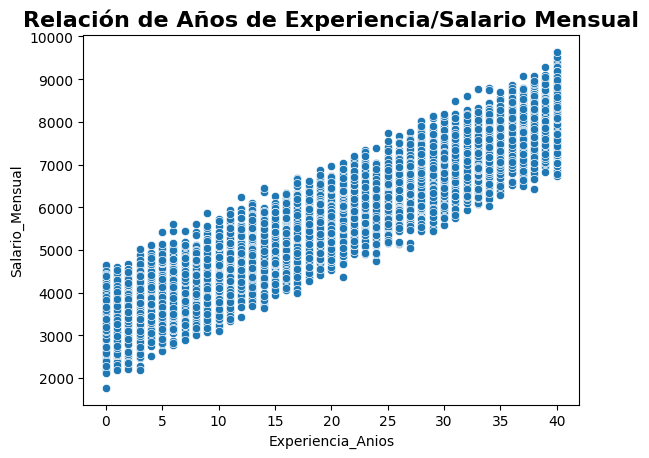

In [ ]:
# Diagrama de dispersión de la variable Salario_Mensual respecto a la variable Experiencia_Anios
sb.scatterplot(x=data.Experiencia_Anios , y=data.Salario_Mensual)
plt.title("Relación de Años de Experiencia/Salario Mensual", fontsize=16, fontweight="bold")
plt.show()

---
✅ **Interpretación**

---
+ Mientras mayores sean los años de experiencia del empleado, mayor será la remuneración que este recibirá.

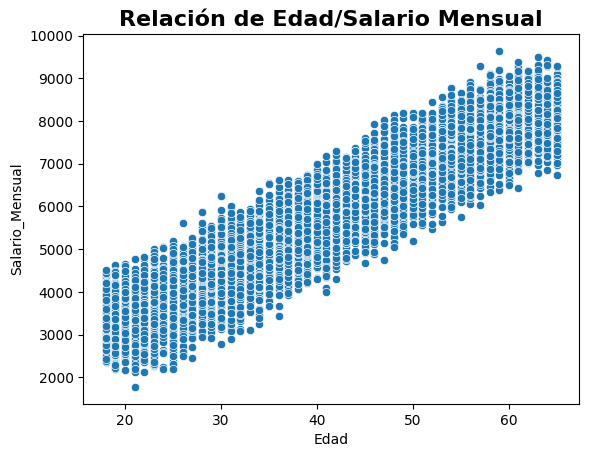

In [ ]:
# Diagrama de dispersión de la variable Salario_Mensual respecto a la variable Edad
sb.scatterplot(x=data.Edad , y=data.Salario_Mensual)
plt.title("Relación de Edad/Salario Mensual", fontsize=16, fontweight="bold")
plt.show()

---
✅ **Interpretación**

---
+ Mientras mayor sea la edad del empleado, mayor será la remuneración que este recibirá.


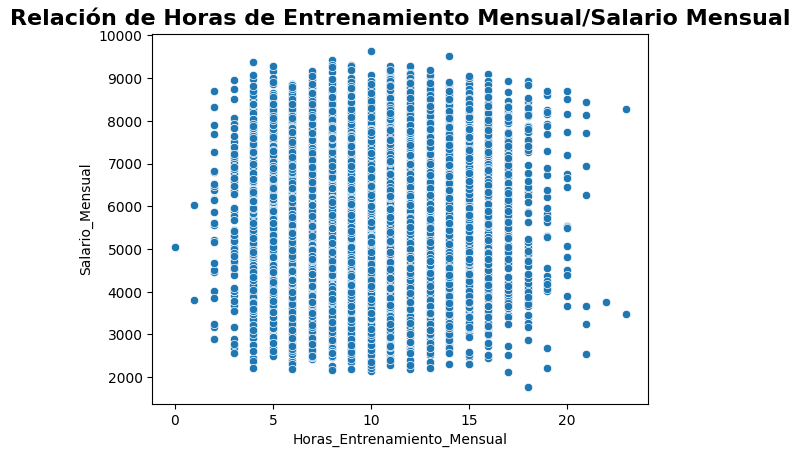

In [ ]:
# Diagrama de dispersión de la variable Salario_Mensual respecto a la variable Horas_Entrenamiento_Mensual
sb.scatterplot(x=data.Horas_Entrenamiento_Mensual , y=data.Salario_Mensual)
plt.title("Relación de Horas de Entrenamiento Mensual/Salario Mensual", fontsize=16, fontweight="bold")
plt.show()

---
✅ **Interpretación**

---
+ No parece existir una correlación fuerte entre las horas de entrenamiento mensual y el salario mensual.

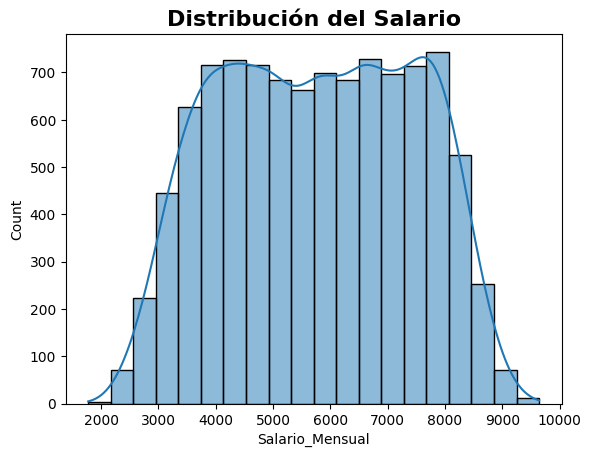

In [ ]:
# Histograma de la variable Salario_Mensual
sb.histplot(data.Salario_Mensual, bins=20, kde=True)
plt.title("Distribución del Salario", fontsize=16, fontweight="bold")
plt.show()

---
✅ **Interpretación**

---
+ En el gráfico anterior, la mayoría de las personas tienen un salario mensual entre 4,000 y 8,000.

+ El salario mensual está bien distribuido, esto nos será útil para realizar nuestros modelos de predicción, ya que no hay sesgos marcados.

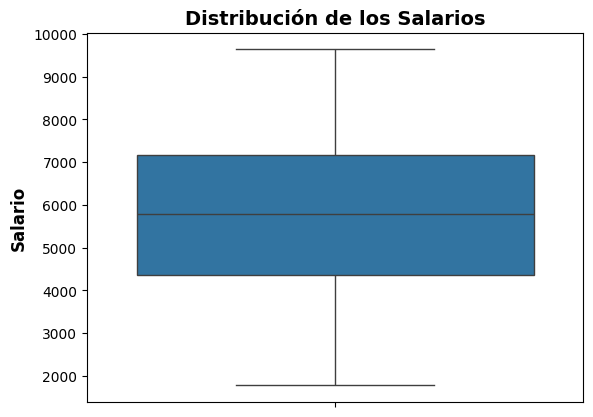

In [ ]:
# Gráfico boxplot para la distribución de los salarios
sb.boxplot(y='Salario_Mensual', data=data_final)
plt.title("Distribución de los Salarios", fontsize=14, fontweight="bold")
plt.ylabel("Salario", fontsize=12, fontweight="bold")
plt.show()

---
✅ **Interpretación**

---
+ el 25% de los empleados tienen a lo más un sueldo aproximadamente de 4.400
+ El 50% de los empleados tienen a lo más un sueldo aproximado de 5.800
+ El 75% de los empleados tienen a lo más un sueldo de 7.100
+ Además de presentar una distribución bastante uniforme, no se presentan datos atipicos.

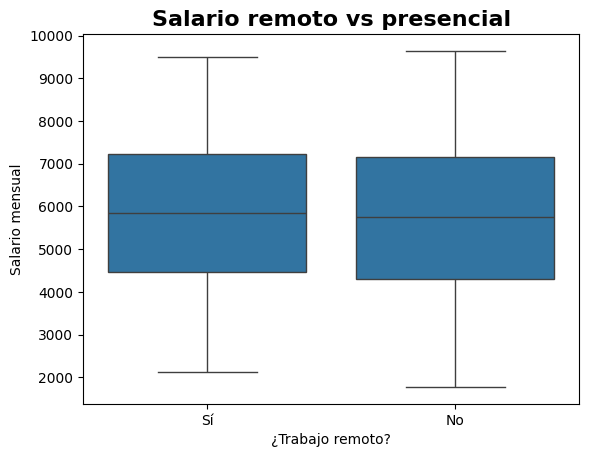

Promedio de salario para empleados presenciales: $5711.07
Promedio de salario para empleados remotos: $5841.92


In [ ]:
# ¿Existen diferencias salariales significativas entre empleados remotos y presenciales?
# Gráfico boxplot
sb.boxplot(data=data, x='Remoto', y='Salario_Mensual')
plt.title("Salario remoto vs presencial", fontsize=16, fontweight="bold")
plt.xlabel("¿Trabajo remoto?")
plt.ylabel("Salario mensual")
plt.show()

# Promedios usando groupby
promedios = data.groupby('Remoto')['Salario_Mensual'].mean()

# Imprimir resultados
for modalidad, salario in promedios.items():
    tipo = "remotos" if modalidad == "Sí" else "presenciales"
    print(f"Promedio de salario para empleados {tipo}: ${salario:.2f}")

---
✅ **Interpretación**

---
+ Los gráficos anteriores realizan una comparación entre el salario mensual de los trabajadores que trabajan remoto y los que trabajan presencial, donde se presenta una diferencia mínima. La diferencia promedio es aproximadamente del 2.25%.

---
✅ Pregunta clave
---
¿Existen diferencias salariales significativas entre empleados remotos y presenciales?

+ La diferencia salarial entre trabajo remoto y trabajo presencial corresponde a un aproximandamente 2.25% aproximadamente, lo cual vendria siendo una aspeco poco relevante al momento de realizar alguna remuneración económica.


# Fase 3 - Preparación de los datos

In [ ]:
data_final.describe(include = np.object_)
#Parecidas a las cualitativas

,Nivel_Educativo,Departamento,Satisfaccion_Laboral,Remoto
count,10000,10000,10000,10000
unique,4,5,4,2
top,Universitaria,Marketing,Alta,No
freq,3444,2077,3914,5902


In [ ]:
#Ventajas
#Captura el orden natural entre categorías, lo cual es útil para variables ordinales.

#Obtiene las columnas a codificar
categoricalfeatures = data.describe(include = np.object_).columns
#Usa OrdinalEncoder
for feature in categoricalfeatures:
  encoder = OrdinalEncoder(categories=[data[feature].unique()])
  data[f'{feature}_codificado'] = encoder.fit_transform(data[[feature]])

data_final

,Edad,Nivel_Educativo,Experiencia_Anios,Departamento,Horas_Entrenamiento_Mensual,Satisfaccion_Laboral,Remoto,Salario_Mensual
0,56,Universitaria,38,Marketing,11,Alta,Sí,8230.50
1,46,Universitaria,23,TI,17,Muy Alta,No,6375.40
2,32,Técnica,13,TI,8,Media,No,4883.02
3,60,Secundaria,37,Finanzas,7,Alta,No,6739.09
4,25,Universitaria,7,Marketing,8,Alta,Sí,4729.60
...,...,...,...,...,...,...,...,...
9995,34,Técnica,13,Ventas,9,Alta,No,4363.37
9996,47,Técnica,29,Marketing,5,Baja,No,5880.12
9997,56,Técnica,32,Recursos Humanos,13,Alta,No,6270.87
9998,24,Universitaria,5,Finanzas,17,Media,Sí,4122.12


In [ ]:
# Separa variables independientes de la dependiente
data_final = data.drop(categoricalfeatures, axis=1)
X = data_final.drop(["Salario_Mensual"], axis=1)
X.head()

,ID,Edad,Experiencia_Anios,Horas_Entrenamiento_Mensual,Nivel_Educativo_codificado,Departamento_codificado,Satisfaccion_Laboral_codificado,Remoto_codificado
0,1,56,38,11,0.0,0.0,0.0,0.0
1,2,46,23,17,0.0,1.0,1.0,1.0
2,3,32,13,8,1.0,1.0,2.0,1.0
3,4,60,37,7,2.0,2.0,0.0,1.0
4,5,25,7,8,0.0,0.0,0.0,0.0


In [ ]:
y = data_final["Salario_Mensual"]
y.head()

,Salario_Mensual
0,8230.50
1,6375.40
2,4883.02
3,6739.09
4,4729.60


In [ ]:
# Separación en data de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

#random_state=29: Es una semilla para que la división sea reproducible.

#scikit-learn divide tus datos en dos partes

#test_size=0.3
#Indica que el 30% de los datos se usará para prueba.
#Por tanto, el 70% restante se usará para entrenamiento.

# Fase 4 - Modelamiento

## Considerando la totalidad de características disponibles

In [ ]:
def interpretacion(algoritmo : str, caracteristicas : np.array, score : float):
  return f"""Modelo de regresión {algoritmo}
   {score :.2%} de la variabilidad en los sueldos se puede explicar utilizando las {len(caracteristicas)} características
   Características elegidas :{caracteristicas.values}."""

## LinearRegression

In [ ]:
# Creación del modelo
linreg = LinearRegression()
# Entrenamiento del modelo
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluación del modelo
print("R squared of the Linear Regression on training set: {:.2%}".format(linreg.score(X_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(linreg.score(X_test, y_test)))

#Seria bueno que los valores se parecieran siendo valores altos

R squared of the Linear Regression on training set: 91.93%
R squared of the Linear Regression on test set: 91.63%


---
✅ Interpretación

---

- El valor de R2 en el conjunto de entrenamiento es muy similar al del conjunto de prueba.
- Esto indica que el modelo no está sobreajustado y, por el contrario, está generalizando correctamente a datos no vistos.
- Es un resultado positivo, ya que demuestra que el modelo se ha entrenado de manera eficaz.

In [ ]:
# Interpretación en el negocio
print(interpretacion("Regresión lineal", X_train.columns, linreg.score(X_test, y_test)))

Modelo de regresión Regresión lineal
   91.63% de la variabilidad en los sueldos se puede explicar utilizando las 8 características
   Características elegidas :['ID' 'Edad' 'Experiencia_Anios' 'Horas_Entrenamiento_Mensual'
 'Nivel_Educativo_codificado' 'Departamento_codificado'
 'Satisfaccion_Laboral_codificado' 'Remoto_codificado'].


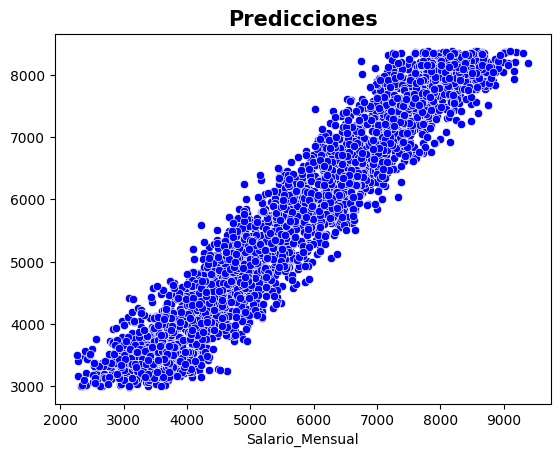

In [ ]:
# Realiza predicciones
y_pred = linreg.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred, color="blue")
plt.title("Predicciones", fontsize=15, fontweight="bold");

---
✅ **Interpretación**

---
+ Se muestra el gráfico de nuestro modelo de predicción "Regresión lineal". Donde las variables utilizadas son: Edad, Años de experiencia, Horas de entrenamiento mensual, Nivel educativo codificado, Departamento codificado, Satisfaccion laboral codificado, Trabajo remoto codificado.

In [ ]:
# Guarda resultados
history = {"LinearRegression" : [linreg, linreg.score(X_test, y_test)]}

## DecisionTreeRegressor


In [ ]:
# Creación del modelo
model_tree = DecisionTreeRegressor(max_depth=7,  # Mínimo de muestras por hoja
                                  random_state=2000)

# Entrenamiento del modelo
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=2000)

In [ ]:
# Evaluación del modelo
print("R squared of the Decision Tree Regressor on training set: {:.2%}".format(model_tree.score(X_train, y_train)))
print("R squared of the Decision Tree Regressor on test set: {:.2%}".format(model_tree.score(X_test, y_test)))

R squared of the Decision Tree Regressor on training set: 95.76%
R squared of the Decision Tree Regressor on test set: 95.44%


---
✅ Interpretación

---

- El valor de R2 en el conjunto de entrenamiento es ligeramente superior al del conjunto de prueba, pero esto no implica que el modelo esté sobreajustado.
- Por el contrario, el modelo está logrando una buena generalización a datos nuevos.
- Además, el porcentaje de variabilidad del salario explicado por las variables utilizadas es elevado, lo que indica una buena capacidad predictiva.

In [ ]:
# Interpretación en el negocio
print(interpretacion("Árbol de decisión", X_train.columns, model_tree.score(X_test, y_test)))

Modelo de regresión Árbol de decisión
   95.44% de la variabilidad en los sueldos se puede explicar utilizando las 8 características
   Características elegidas :['ID' 'Edad' 'Experiencia_Anios' 'Horas_Entrenamiento_Mensual'
 'Nivel_Educativo_codificado' 'Departamento_codificado'
 'Satisfaccion_Laboral_codificado' 'Remoto_codificado'].


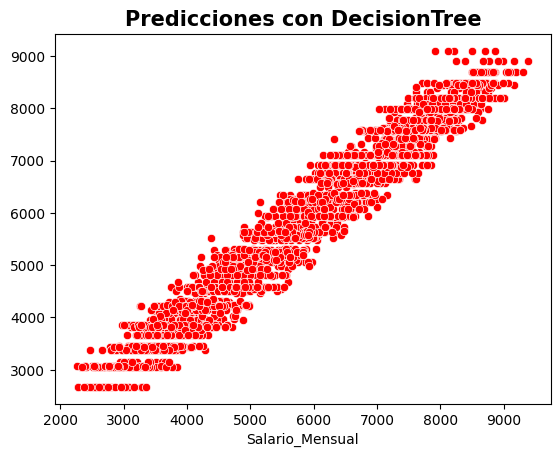

In [ ]:
# Realiza predicciones
y_pred_tree = model_tree.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred_tree, color="red")
plt.title("Predicciones con DecisionTree", fontsize=15, fontweight="bold");

---
✅ **Interpretación**

---
+ Se muestra el gráfico de nuestro modelo de predicción "DecisionTreeRegressor" el cual se utilizarón las mismas variables que el modelo anterior, pero este presenta un aumento en su presición.
+ Respecto al modelo anterior, el % de presición de entrenamiento aumentó un 3.83% y en su porcentaje de presición de prueba aumentó un 3.81%.

In [ ]:
# Guarda resultados
history["DecisionTreeRegressor"] = [model_tree, model_tree.score(X_test, y_test)]

## RandomForestRegressor

In [ ]:
# Creación del modelo
model_rf = RandomForestRegressor(n_estimators=165, max_depth=19,  # Mínimo de muestras por hoja
                                  random_state=165)
# Entrenamiento del modelo
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=19, n_estimators=165, random_state=165)

In [ ]:
# Evaluación
print("R squared of the Random Forest Regressor on training set: {:.2%}".format(model_rf.score(X_train, y_train)))
print("R squared of the Random Forest Regressor on test set: {:.2%}".format(model_rf.score(X_test, y_test)))

R squared of the Random Forest Regressor on training set: 99.44%
R squared of the Random Forest Regressor on test set: 96.12%


---
✅ Interpretación

---

- El valor de R2 en el conjunto de entrenamiento es algo mayor que en el conjunto de prueba, pero esto no indica que el modelo esté sobreajustado.
- Por el contrario, el modelo de regresión con bosque aleatorio se está generalizando adecuadamente a datos nuevos.
- Además, el porcentaje de variabilidad explicada por las variables es alto, lo cual refleja un muy buen rendimiento predictivo.
En conjunto, estos resultados son excelentes.

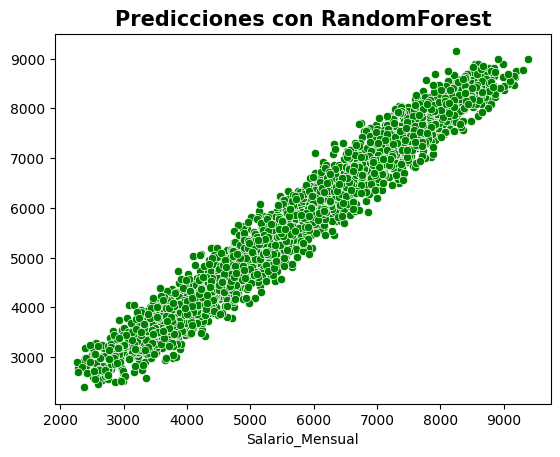

In [ ]:
y_pred_rf = model_rf.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred_rf, color="green")
plt.title("Predicciones con RandomForest", fontsize=15, fontweight="bold");

---
✅ **Interpretación**

---
+ Se muestra el gráfico de nuestro modelo de predicción "RandomForestRegressor" el cual se utilizarón las mismas variables que el modelo anterior.
+ Este modelo presenta un aumento de su presición significativamente mayor en comparación a el modelo "DecisionTreeRegressor" y el modelo "LinearRegression", donde su presición en entrenamiento aumentó un 3.68% y un 7.51% respectivamente. Y la presiciónde prueba aumentó un 0.68% y un 4.49%.

In [ ]:
# Guarda resultados
history["RandomForestRegressor"] = [model_rf, model_rf.score(X_test, y_test)]

## Con selección de características por parte del equipo

Variables a seleccionadas:
+ Edad -> Puede reflejar experiencia acumulada o nivel en la carrera profesional.
+ Experiencia -> Niveles más altos de educación se asocian con mejores salarios.
+ Nivel educativo -> Directamente relacionada con el salario en la mayoría de los casos.

In [ ]:
data_final.columns

Index(['ID', 'Edad', 'Experiencia_Anios', 'Horas_Entrenamiento_Mensual',
       'Salario_Mensual', 'Nivel_Educativo_codificado',
       'Departamento_codificado', 'Satisfaccion_Laboral_codificado',
       'Remoto_codificado'],
      dtype='object')

In [ ]:
X_nueva = data_final.drop(["ID", "Horas_Entrenamiento_Mensual", "Salario_Mensual", "Departamento_codificado", "Satisfaccion_Laboral_codificado", "Remoto_codificado"], axis=1)
X_nueva.head()

,Edad,Experiencia_Anios,Nivel_Educativo_codificado
0,56,38,0.0
1,46,23,0.0
2,32,13,1.0
3,60,37,2.0
4,25,7,0.0


In [ ]:
Y_nueva = data_final["Salario_Mensual"]
Y_nueva.head()

,Salario_Mensual
0,8230.50
1,6375.40
2,4883.02
3,6739.09
4,4729.60


In [ ]:
# Separación en data de entrenamiento y test,
X_nueva_train, X_nueva_test, Y_nueva_train, Y_nueva_test = train_test_split(X_nueva, Y_nueva, test_size=0.3, random_state=2003)

In [ ]:
def interpretacion(algoritmo : str, caracteristicas : np.array, score : float):
  return f"""Modelo de regresión {algoritmo}
   {score :.2%} de la variabilidad en los sueldos se puede explicar utilizando las {len(caracteristicas)} características
   Características elegidas :{caracteristicas.values}."""

## LinearRegression Equipo


In [ ]:
# Creación del modelo
modelo_lineal = LinearRegression()
# Entrenamiento del modelo
modelo_lineal.fit(X_nueva_train, Y_nueva_train)

LinearRegression()

In [ ]:
# Evaluación del modelo
print("R squared of the Linear Regression on training set: {:.2%}".format(modelo_lineal.score(X_nueva_train, Y_nueva_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(modelo_lineal.score(X_nueva_test, Y_nueva_test)))

R squared of the Linear Regression on training set: 91.11%
R squared of the Linear Regression on test set: 90.78%


In [ ]:
# Interpretación en el negocio
print(interpretacion("Regresión lineal", X_nueva_train.columns, modelo_lineal.score(X_nueva_test, Y_nueva_test)))

Modelo de regresión Regresión lineal
   90.78% de la variabilidad en los sueldos se puede explicar utilizando las 3 características
   Características elegidas :['Edad' 'Experiencia_Anios' 'Nivel_Educativo_codificado'].


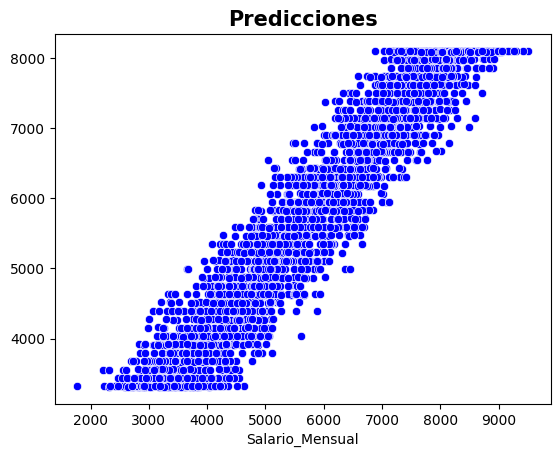

In [ ]:
# Realiza predicciones
Y_nueva_pred = modelo_lineal.predict(X_nueva_test)
sb.scatterplot(x=Y_nueva_test , y=Y_nueva_pred, color="blue")
plt.title("Predicciones", fontsize=15, fontweight="bold");

In [ ]:
# Guarda resultados
history = {"LinearRegression" : [modelo_lineal, modelo_lineal.score(X_nueva_test, Y_nueva_test)]}

## DecisionTreeRegressor Equipo


In [ ]:
# Creación del modelo
modelo_arbol = DecisionTreeRegressor(random_state=29)
# Entrenamiento del modelo
modelo_arbol.fit(X_nueva_train, Y_nueva_train)

DecisionTreeRegressor(random_state=29)

In [ ]:
# Evaluación del modelo
print("R squared of the Decision Tree Regressor on training set: {:.2%}".format(modelo_arbol.score(X_nueva_train, Y_nueva_train)))
print("R squared of the Decision Tree Regressor on test set: {:.2%}".format(modelo_arbol.score(X_nueva_test, Y_nueva_test)))

R squared of the Decision Tree Regressor on training set: 96.06%
R squared of the Decision Tree Regressor on test set: 94.23%


In [ ]:
# Interpretación en el negocio
print(interpretacion("Árbol de decisión", X_nueva_train.columns, modelo_arbol.score(X_nueva_test, Y_nueva_test)))

Modelo de regresión Árbol de decisión
   94.23% de la variabilidad en los sueldos se puede explicar utilizando las 3 características
   Características elegidas :['Edad' 'Experiencia_Anios' 'Nivel_Educativo_codificado'].


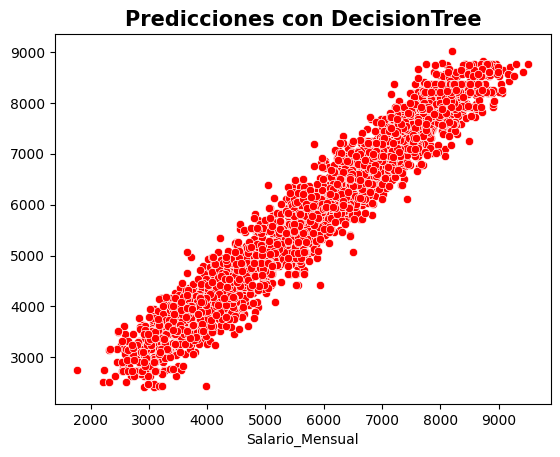

In [ ]:
# Realiza predicciones
Y_nueva_pred_tree = modelo_arbol.predict(X_nueva_test)
sb.scatterplot(x=Y_nueva_test , y=Y_nueva_pred_tree, color="red")
plt.title("Predicciones con DecisionTree", fontsize=15, fontweight="bold");

In [ ]:
# Guarda resultados
history["DecisionTreeRegressor"] = [modelo_arbol, modelo_arbol.score(X_nueva_test, Y_nueva_test)]

## RandomForestRegressor

In [ ]:
# Creación del modelo
modelo_random = RandomForestRegressor(n_estimators=100, random_state=29)
# Entrenamiento del modelo
modelo_random.fit(X_nueva_train, Y_nueva_train)

RandomForestRegressor(random_state=29)

In [ ]:
# Evaluación
print("R squared of the Random Forest Regressor on training set: {:.2%}".format(modelo_random.score(X_nueva_train, Y_nueva_train)))
print("R squared of the Random Forest Regressor on test set: {:.2%}".format(modelo_random.score(X_nueva_test, Y_nueva_test)))

R squared of the Random Forest Regressor on training set: 96.04%
R squared of the Random Forest Regressor on test set: 94.42%


In [ ]:
# Interpretación en el negocio
print(interpretacion("RandomForest", X_nueva_train.columns, modelo_random.score(X_nueva_test, Y_nueva_test)))

Modelo de regresión RandomForest
   94.42% de la variabilidad en los sueldos se puede explicar utilizando las 3 características
   Características elegidas :['Edad' 'Experiencia_Anios' 'Nivel_Educativo_codificado'].


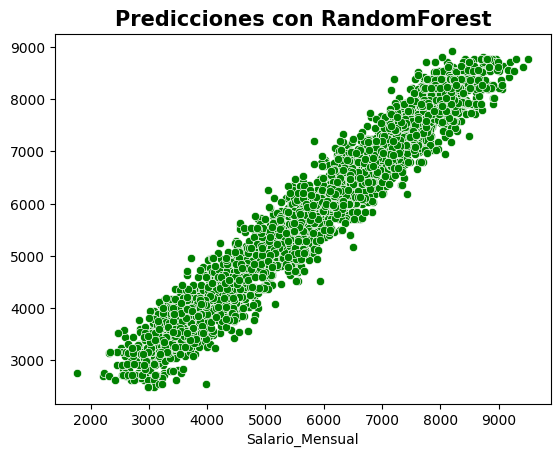

In [ ]:
Y_nueva_pred_rf = modelo_random.predict(X_nueva_test)
sb.scatterplot(x=Y_nueva_test , y=Y_nueva_pred_rf, color="green")
plt.title("Predicciones con RandomForest", fontsize=15, fontweight="bold");

In [ ]:
# Guarda resultados
history["RandomForestRegressor"] = [modelo_random, modelo_random.score(X_nueva_test, Y_nueva_test)]

# Fase 5 - Evaluación

In [ ]:
def mae_interpretacion(modelo : str, value : float):
  print(f"El modelo '{modelo}' pudo predecir el sueldo de cada trabajador en el conjunto de prueba con un error de ± $ {value:.2f} del sueldo real.")

def msle_interpretacion(modelo : str, value : float):
  print(f"El modelo '{modelo}' pudo predecir el sueldo de cada trabajador en el conjunto de prueba con un error de ± {value: .2%} del sueldo real.")

In [ ]:
# Evaluando el Modelo de Regresión Lineal

d = {"real": y_test, "prediccion": y_pred}
df_lr = pd.DataFrame(data=d)
df_lr["delta"] = df_lr["prediccion"]-df_lr["real"]
df_lr

In [ ]:
print("Mean Absolute Error of the Linear Regression on test set is {:.2f}".format(mean_absolute_error(y_test, y_pred)))

In [ ]:
mae_interpretacion("Regresión lineal", mean_absolute_error(y_test, y_pred))

In [ ]:
# Evaluando el Modelo de Árbol de Decisión de regresión

d = {"real": y_test, "prediccion": y_pred_tree}
df_dt = pd.DataFrame(data=d)
df_dt["delta"] = df_dt["prediccion"]-df_dt["real"]
df_dt

In [ ]:
print("Mean Absolute Error of the Decision Tree Regressor on test set is {:.2f}".format(mean_absolute_error(y_test,y_pred_tree)))

In [ ]:
mae_interpretacion("Árbol de decisión", mean_absolute_error(y_test, y_pred_tree))

In [ ]:
print("Mean Squared Log Error of the Decision Tree Regressor on test set is {:.2%}".format(mean_squared_log_error(y_test,y_pred_tree)))

In [ ]:
msle_interpretacion("Árbol de decisión", mean_squared_log_error(y_test,y_pred_tree))

In [ ]:
# Evaluando el Modelo de Bosque Aleatorio de árboles de decisión

d = {"real": y_test, "prediccion": y_pred_rf}
df_rf = pd.DataFrame(data=d)
df_rf["delta"] = df_rf["prediccion"]-df_rf["real"]
df_rf

In [ ]:
print("Mean Absolute Error of the Random Forest Regressor on test set is {:.2f}".format(mean_absolute_error(y_test,y_pred_rf)))

In [ ]:
mae_interpretacion("RandomForest", mean_absolute_error(y_test, y_pred_rf))

In [ ]:
print("Mean Squared Log Error of the Random Forest Regressor on test set is {:.2%}".format(mean_squared_log_error(y_test,y_pred_rf)))

In [ ]:
msle_interpretacion("RandomForest", mean_squared_log_error(y_test,y_pred_rf))

In [ ]:
def get_bestModel( history : dict):
  # Inicializar una variable para almacenar el mayor valor
  mayor_valor = float('-inf')

  # Recorrer el diccionario
  for modelo, data in history.items():
    # Comparar el segundo elemento de la lista (data[1] almacena el score) con el mayor encontrado hasta ahora
    if data[1] > mayor_valor:
        mayor_valor = data[1]
        best_model = data[0]

  return best_model, mayor_valor, modelo

In [ ]:
best_model, best_score, name_model = get_bestModel(history)
print("El mejor rendimiento es: {0:.2%} y le corresponde a {1}".format(best_score, name_model))

In [ ]:
tabla = {
    "Modelo": [linear_model],
    "R² train": ["9,999"],
    "R² test": ["9,999"],
    "MAE": ["9,99"],
    "MSLE": ["99,99%"],
    "Overfitting": ["Sí/No"]
}

tabla = pd.DataFrame(data)
from IPython.display import display
display(tabla.style.set_caption("Evaluación de desempeño del modelo de regresión"))

## Carga de archivo JSON con datos completamente nuevos

## Generación de JSON con las predicciones del mejor modelo